In [51]:
from graphviz import Digraph

In [72]:
dot = Digraph(comment = "The Round Table", engine="neato")

In [73]:
dot.node("XXX", "King Arthur", pos='0,0!')

In [74]:
dot.node("123XX", "Sir Bedevere the wise", pos='-3,0!')

In [75]:
dot.node("L", "Sir Lancelot", pos='0,1!')

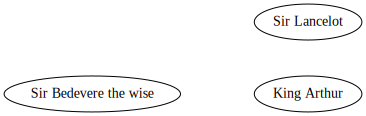

In [76]:
dot

In [77]:
print(dot.source)

// The Round Table
digraph {
	XXX [label="King Arthur" pos="0,0!"]
	"123XX" [label="Sir Bedevere the wise" pos="-3,0!"]
	L [label="Sir Lancelot" pos="0,1!"]
}


In [58]:
# dot.render('sss.gv',view=True)

In [230]:
bb = Digraph(comment = "Baseball", engine="neato")

In [235]:
bb.node("XXX","XXX",pos = '0,0!', shape='rect', style='filled', fillcolor='black', fontcolor='white')

In [236]:
import numpy as np
print(np.sqrt(1/2))
print(2*np.sqrt(1/2))
print(3*np.sqrt(1/2))

0.7071067811865476
1.4142135623730951
2.121320343559643


In [237]:
bb.node("0XX","0XX",pos='0,-1!',color='red',style='filled',fillcolor='red')
bb.node("0X","0X",pos='0,-2!',color='red',style='filled',fillcolor='red')
bb.node("0","0",pos='0,-3!',color='red',style='filled',fillcolor='red')
bb.node("1XX","1XX",pos='1,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("1X","1X",pos='2,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("1","1",pos='3,0!',color='yellow',style='filled',fillcolor='yellow')
bb.node("12XX","12XX",pos='0.7071,0.7071!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("12X","12X",pos='1.4142,1.4142!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("12","12",pos='2.1213,2.1213!',color='yellowgreen',style='filled',fillcolor='yellowgreen')
bb.node("2XX","2XX",pos='0,1!',color='green',style='filled',fillcolor='green')
bb.node("2X","2X",pos='0,2!',color='green',style='filled',fillcolor='green')
bb.node("2","2",pos='0,3!',color='green',style='filled',fillcolor='green')
bb.node("23XX","23XX",pos='-0.7071,0.7071!',color='cyan',style='filled',fillcolor='cyan')
bb.node("23X","23X",pos='-1.4142,1.4142!',color='cyan',style='filled',fillcolor='cyan')
bb.node("23","23",pos='-2.1213,2.1213!',color='cyan',style='filled',fillcolor='cyan')
bb.node("3XX","3XX",pos='-1,0!',color='blue',style='filled',fillcolor='blue')
bb.node("3X","3X",pos='-2,0!',color='blue',style='filled',fillcolor='blue')
bb.node("3","3",pos='-3,0!',color='blue',style='filled',fillcolor='blue')
bb.node("123XX","123XX",pos='-0.7071,-0.7071!',color='violetred',style='filled',fillcolor='violetred')
bb.node("123X","123X",pos='-1.4142,-1.4142!',color='violetred',style='filled',fillcolor='violetred')
bb.node("123","123",pos='-2.1213,-2.1213!',color='violetred',style='filled',fillcolor='violetred')
bb.node("13XX","13XX",pos='0.7071,-0.7071!',color='orange',style='filled',fillcolor='orangered')
bb.node("13X","13X",pos='1.4142,-1.4142!',color='orange',style='filled',fillcolor='orangered')
bb.node("13","13",pos='2.1213,-2.1213!',color='orange',style='filled',fillcolor='orangered')


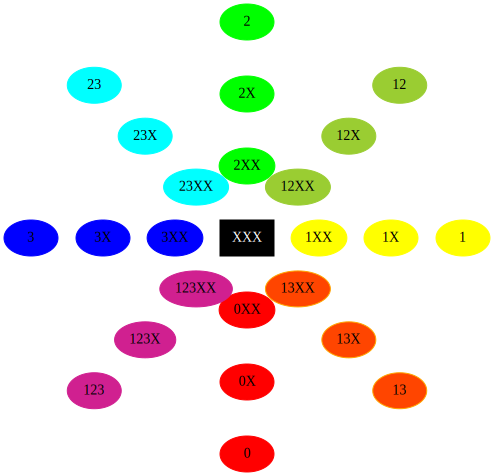

In [238]:
bb

In [239]:
print(bb.source)

// Baseball
digraph {
	XXX [label=XXX fillcolor=black fontcolor=white pos="0,0!" shape=rect style=filled]
	"0XX" [label="0XX" color=red fillcolor=red pos="0,-1!" style=filled]
	"0X" [label="0X" color=red fillcolor=red pos="0,-2!" style=filled]
	0 [label=0 color=red fillcolor=red pos="0,-3!" style=filled]
	"1XX" [label="1XX" color=yellow fillcolor=yellow pos="1,0!" style=filled]
	"1X" [label="1X" color=yellow fillcolor=yellow pos="2,0!" style=filled]
	1 [label=1 color=yellow fillcolor=yellow pos="3,0!" style=filled]
	"12XX" [label="12XX" color=yellowgreen fillcolor=yellowgreen pos="0.7071,0.7071!" style=filled]
	"12X" [label="12X" color=yellowgreen fillcolor=yellowgreen pos="1.4142,1.4142!" style=filled]
	12 [label=12 color=yellowgreen fillcolor=yellowgreen pos="2.1213,2.1213!" style=filled]
	"2XX" [label="2XX" color=green fillcolor=green pos="0,1!" style=filled]
	"2X" [label="2X" color=green fillcolor=green pos="0,2!" style=filled]
	2 [label=2 color=green fillcolor=green pos="0,3!" sty